# LUT Model: Figure Reproduction

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.lines import Line2D
import numpy as np
import scipy.io as sio
from scipy.interpolate import interp1d
import pandas as pd
from brian2 import flatten
import sys
sys.path.append('../') # Move to root directory to match README.md instructions

from model import LUT_Model as model # Import the model
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Setup matplotlib formatting settings
params = {
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'font.size': 10,
    'legend.fontsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'figure.figsize': [3.4039020340390205, 2.1037271514110163],
    'figure.dpi': 300,
    'savefig.dpi': 300,
    #'savefig.format': 'pdf',
    #'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1,
    'text.usetex': True,
    'font.family': 'serif',
    'axes.linewidth': 1,
    'axes.edgecolor': 'black',
    # Legend
    'legend.frameon': True,
    'legend.facecolor': 'white',
    'legend.edgecolor': 'black',
    'legend.shadow': False,
    'legend.framealpha': 1,
    # Add major ticks
    'xtick.major.size': 4,
    'xtick.major.width': 1,
    'ytick.major.size': 4,
    'ytick.major.width': 1,
    # Add ticks to bottom and left only
    'xtick.top': False,
    'xtick.bottom': True,
    'ytick.left': True,
    'ytick.right': False,
    # Make ticks face out
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    # Get rid of grid
    'axes.grid': False,
    # Set background color to white
    'axes.facecolor': 'white',
}

plt.rcParams.update(params)

## Figure 2: Time series plots illustrating the dynamic behaviour of the model, including bladder pressure, volume, and neural activity.

In [3]:
seed = 42
dT = 0.1
day = 24 * 60 * 60
maxTime = 1 * day

# Run the simulation
LUT = model.LUT()
data = LUT.process_neural_input(maxTime, dT, seed=seed, p_unit='cmH2O', V_unit='ml')
data

,V_B,f_aD_s,f_aS_s,r_U,Q,p_D,p_S,Q_in,t,w_e_s,w_i_s,w_s_s,voiding
0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.050000,NaN,NaN,NaN,NaN,NaN
1,0.000000,0.004000,0.25000,0.0,0.0,0.178035,30.051363,0.000000,0.0,0.040000,0.100000,0.5,False
2,0.000000,0.007560,0.37500,0.0,0.0,0.336485,44.567187,0.000000,0.1,0.040000,0.100000,0.5,False
3,0.000000,0.010728,0.43750,0.0,0.0,0.477507,51.825098,0.000000,0.2,0.040000,0.100000,0.5,False
4,0.000000,0.013548,0.46875,0.0,0.0,0.603016,55.454054,0.000000,0.3,0.040000,0.100000,0.5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
863996,484.580062,0.814345,0.50000,0.0,0.0,53.061212,59.083010,0.028931,86399.5,0.948206,0.164169,0.5,False
863997,484.582955,0.814364,0.50000,0.0,0.0,53.062329,59.083010,0.028931,86399.6,0.948221,0.164159,0.5,False
863998,484.585848,0.814384,0.50000,0.0,0.0,53.063446,59.083010,0.028931,86399.7,0.948235,0.164150,0.5,False
863999,484.588741,0.814403,0.50000,0.0,0.0,53.064563,59.083010,0.028931,86399.8,0.948249,0.164140,0.5,False


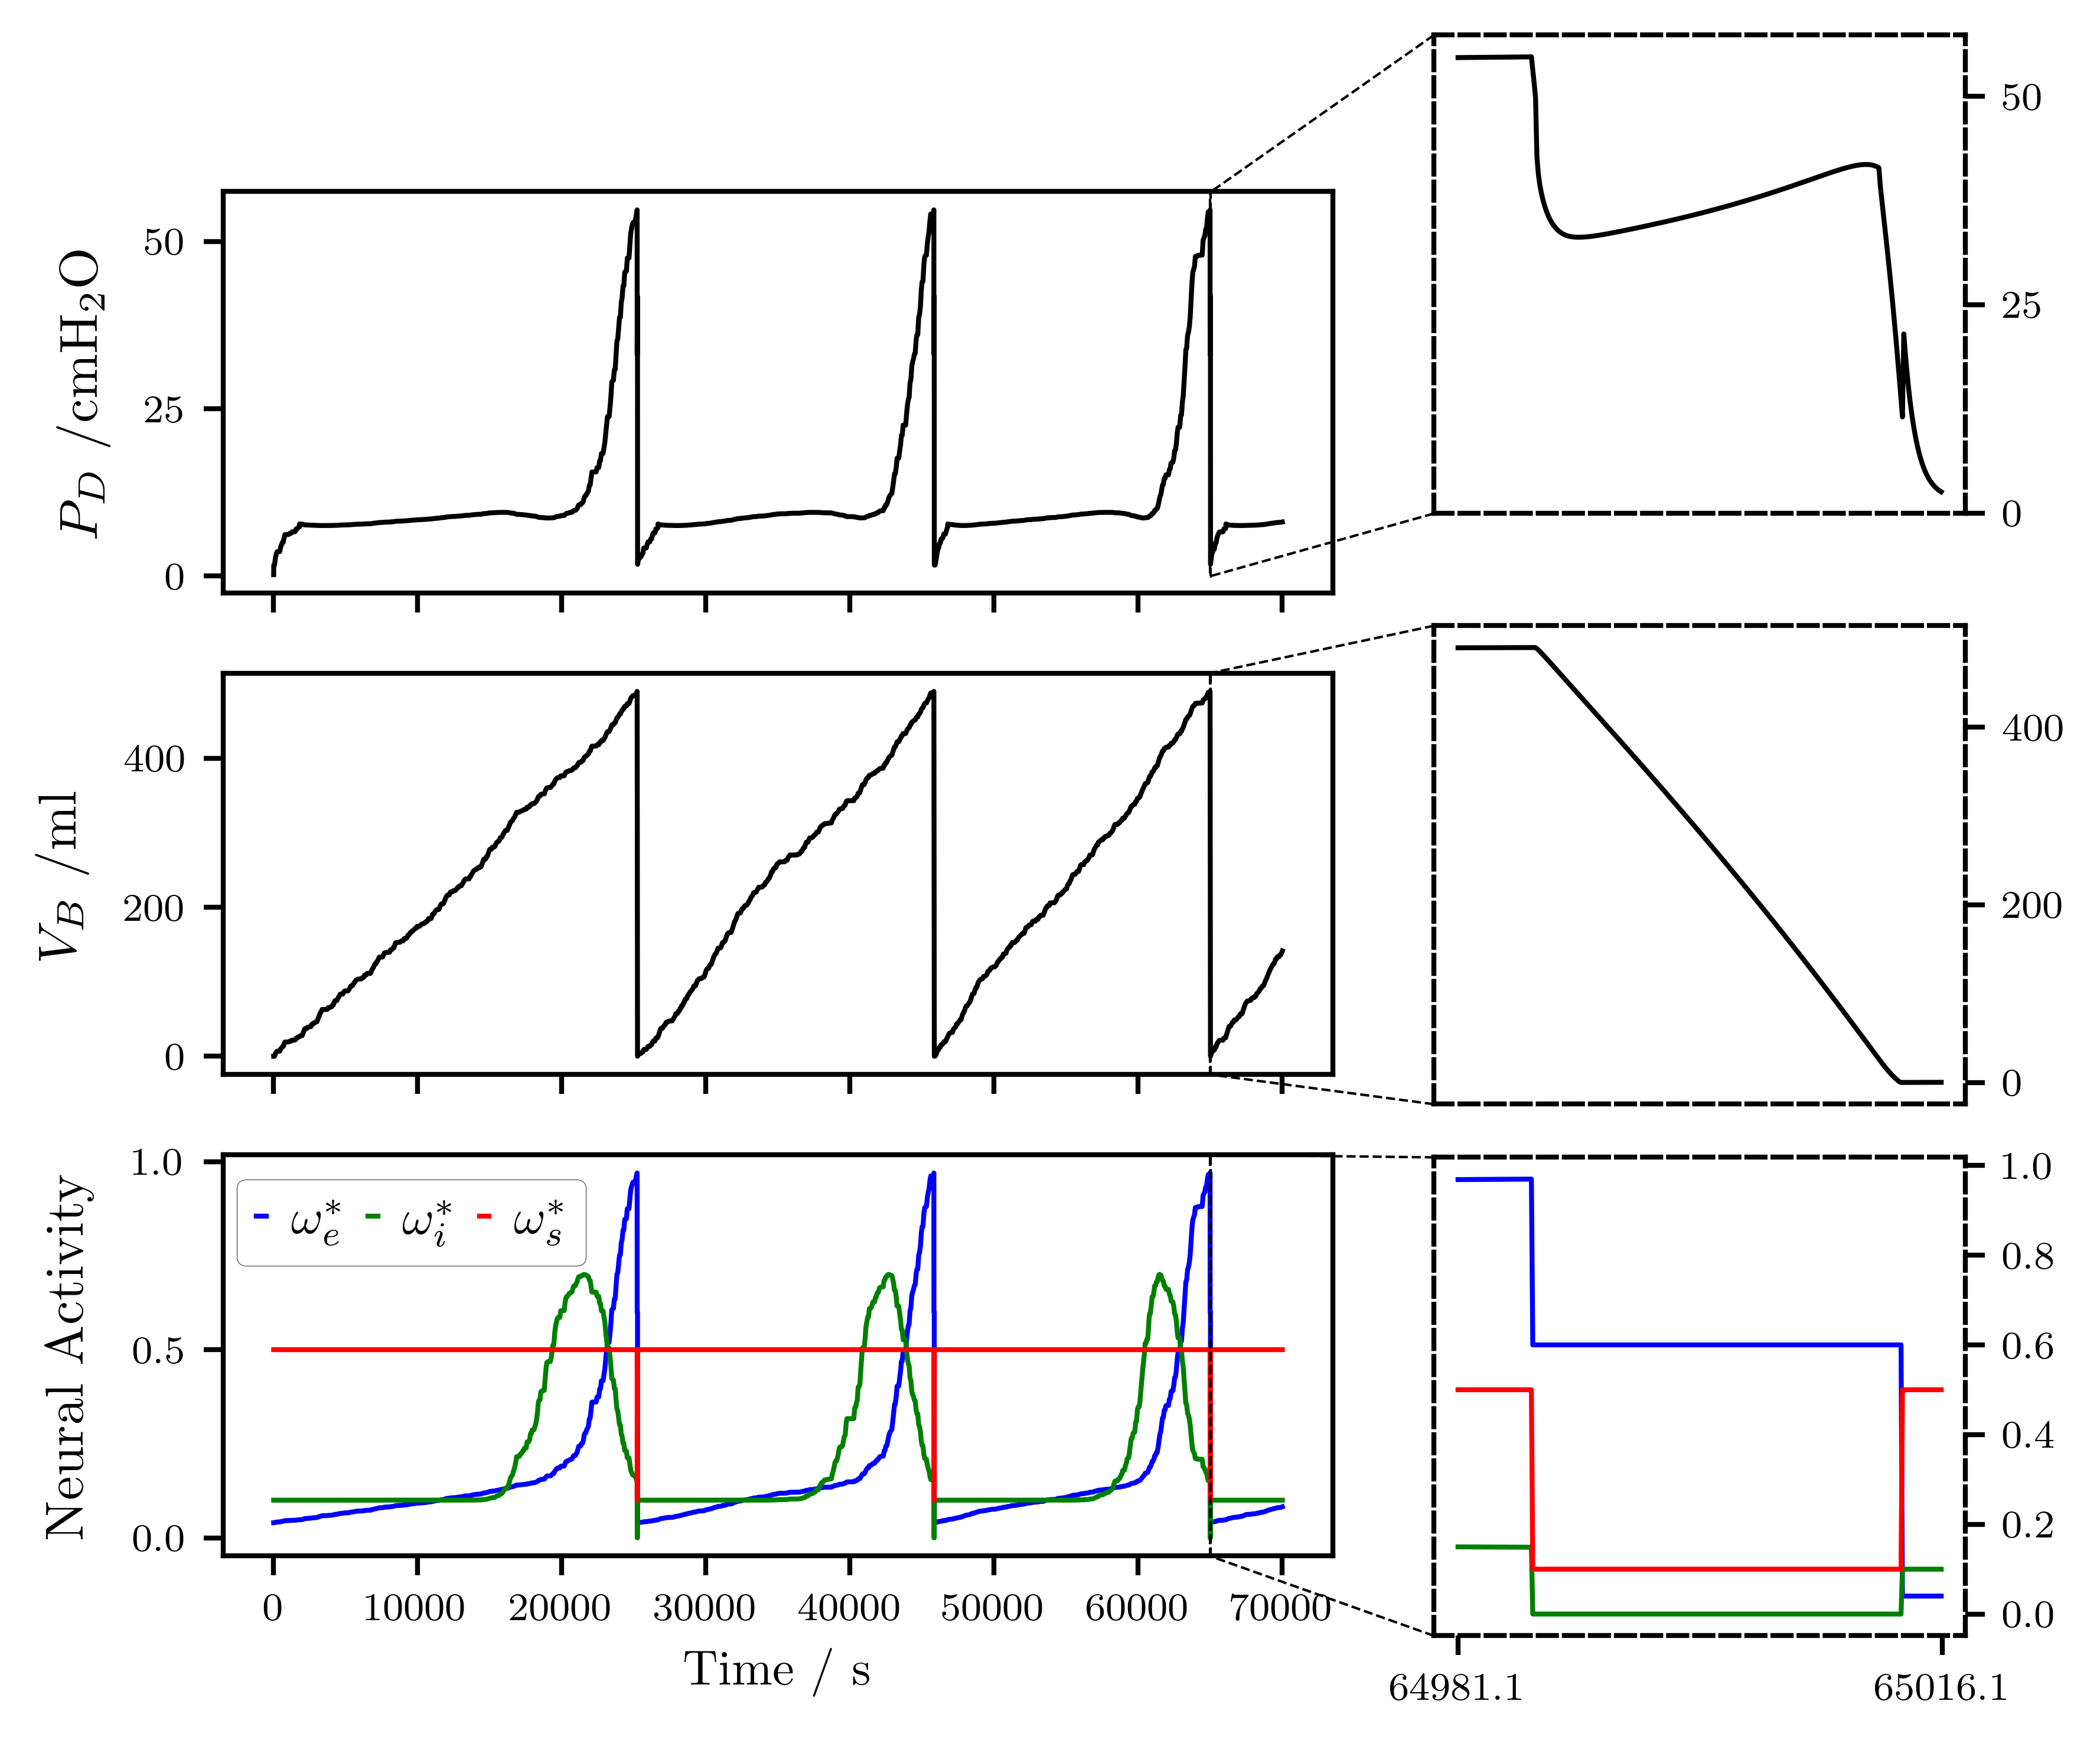

In [4]:
plot_data = data[data['t'] < 70000].copy()
my_dpi = 600
fig, axs = plt.subplots(3, 2, sharex='col', figsize=(4000/my_dpi, 3000/my_dpi), dpi=my_dpi, gridspec_kw={'width_ratios': [2, 1]}, sharey='row')

# Clear the right plot
axs[0, 1].axis('off')
axs[1, 1].axis('off')
axs[2, 1].axis('off')
# Change text size
plt.rcParams.update({'font.size': 11})

lw = 1
axs[0,0].plot(plot_data['t'], plot_data['p_D'], label='p_D', color='black', linewidth=lw)
axs[0,0].set_yticks([0, 25, 50])
axs[1,0].plot(plot_data['t'], plot_data['V_B'], label='V_B', color='black', linewidth=lw)

# On the third plot, plot the neural activity for all three neurons
axs[2,0].plot(plot_data['t'], plot_data['w_e_s'], color='blue', label='$\\omega_{e}^*$', linewidth=lw)
axs[2,0].plot(plot_data['t'], plot_data['w_i_s'], color='green', label='$\\omega_{i}^*$', linewidth=lw)
axs[2,0].plot(plot_data['t'], plot_data['w_s_s'], color='red', label='$\\omega_{s}^*$', linewidth=lw)

# Set y-ticks on neural activity plot to 0, 0.5, 1
axs[2,0].set_yticks([0, 0.5, 1])

# Get the time of the last void
last_void = plot_data[plot_data['voiding'] == 1].iloc[-1]['t']

v_start = int(last_void*10) - 320 # Start window before voiding
v_end = v_start + 350 # End window after voiding

# Create a zoomed in plot using inset_axes
height = 1.35
width = 1.5

x_pos = 3000
y1_pos, y2_pos, y3_pos = 600, 1500, 2500
axins = inset_axes(axs[2,0], height=height, width=width, loc='center', bbox_to_anchor=(x_pos, y1_pos))
axins.plot(plot_data['t'][v_start:v_end], plot_data['w_e_s'][v_start:v_end], color='blue', linewidth=lw)
axins.plot(plot_data['t'][v_start:v_end], plot_data['w_i_s'][v_start:v_end], color='green', linewidth=lw)
axins.plot(plot_data['t'][v_start:v_end], plot_data['w_s_s'][v_start:v_end], color='red', linewidth=lw)
# Remove ticks and labels
axins.set_xlabel('')
axins.set_ylabel('')
# Only show simplified x ticks (first and last)
axins.set_xticks([plot_data['t'][v_start+1], plot_data['t'][v_end+1]])
# Move y-axis to the right
axins.yaxis.tick_right()
# Mark the inset 
color = 'black'
# Use dashed lines
mark_inset(axs[2,0], axins, loc1=2, loc2=3, zorder=10, lw=0.5, ec=color, fc='none', ls='--')

for axis in ['top','bottom','left','right']:
    axins.spines[axis].set_color(color)
    axins.spines[axis].set_linestyle('--')


axins = inset_axes(axs[0,0], height=height, width=width, loc='center', bbox_to_anchor=(x_pos, y3_pos))
axins.plot(plot_data['t'][v_start:v_end], plot_data['p_D'][v_start:v_end], color='black', linewidth=lw)
# Remove ticks and labels
axins.set_xticks([])
axins.set_xlabel('')
axins.set_ylabel('')
# Move y-axis to the right
axins.yaxis.tick_right()
# Use same y-ticks as main plot
axins.set_yticks([0, 25, 50])

# Mark the inset
color = 'black'
# Use dashed lines
mark_inset(axs[0,0], axins, loc1=2, loc2=3, zorder=10, lw=0.5, ec=color, fc='none', ls='--')

for axis in ['top','bottom','left','right']:
    axins.spines[axis].set_color(color)
    axins.spines[axis].set_linestyle('--')


axins = inset_axes(axs[1,0], height=height, width=width, loc='center', bbox_to_anchor=(x_pos, y2_pos))
axins.plot(plot_data['t'][v_start:v_end], plot_data['V_B'][v_start:v_end], color='black', linewidth=lw)
# Remove ticks and labels
axins.set_xticks([])
axins.set_yticks([])
axins.set_xlabel('')
axins.set_ylabel('')
# Move y-axis to the right
axins.yaxis.tick_right()
# Use same y-ticks as main plot 
axins.set_yticks([0, 200, 400])

# Mark the inset
color = 'black'
# Use dashed lines
mark_inset(axs[1,0], axins, loc1=2, loc2=3, zorder=10, lw=0.5, ec=color, fc='none', ls='--')

for axis in ['top','bottom','left','right']:
    axins.spines[axis].set_color(color)
    axins.spines[axis].set_linestyle('--')


# Set x-axis label
axs[2,0].set_xlabel('Time / s')

# Set y-axis labels
# Change text size
font_size = 11
axs[0,0].set_ylabel('$P_D$ /cmH$_2$O', fontsize=font_size, labelpad=7)
axs[1,0].set_ylabel('$V_B$ /ml', fontsize=font_size, labelpad=7)
axs[2,0].set_ylabel('Neural Activity', fontsize=font_size, labelpad=8)
# Format the legend
axs[2,0].legend(loc='upper left', bbox_to_anchor=(-0.01, 1), fontsize=font_size-1, frameon=True, edgecolor='black', ncol=3, handlelength=0.2, handletextpad=0.5, columnspacing=0.5)
axs[2,0].get_legend().get_frame().set_linewidth(0.1)

# Export
plt.savefig('Figure2.png', dpi=my_dpi, bbox_inches='tight')
plt.show()
plt.rcParams.update({'font.size': 10}) # Reset font size to default for other figures

## Figure 3: Pressure-volume relationship for scaled animal data and LUT model.

In [5]:
# Load in rat data
rat_data = sio.loadmat('RealBladderData.mat')

# Convert to dataframe
rat_data_df = pd.DataFrame({"label":pd.Series(rat_data).index, "list":pd.Series(rat_data).values})


sample_rate = 10 #Hz
#Extract required data and form new dataframe
fixed_data = []
for k in rat_data_df.index:
    if k in [0, 1, 2]:
        continue
    dat1 = rat_data_df["list"].values[k].tolist()
    fixed_data.append(list(flatten(dat1)))


#Convert list to new dataframe with correct index
rat_data = pd.DataFrame(fixed_data, index=rat_data_df["label"][[3, 4, 5, 6, 7, 8, 9, 10, 11]])

sample_rate = 50 #Hz

#Performed using interpolation of data, as signal is non-periodic
#Define interval for sampling rate
interval = 1 / sample_rate

#Define range of values to feed to interpolation function, filling bounds outside with zero
press_rang = np.arange(0, rat_data.loc["tpressure"].max(), interval) #trial time at 1kHz
vol_rang = np.arange(0, rat_data.loc["tvolume"].max(), interval)


#Create interpolation function
def upsampled_func(x, y):
    func = interp1d(
        x=x,
        y=y,
        fill_value=(0, 0),
        bounds_error=False
    )
    return func


#Upsample data, return arrays
upsampled_vol = upsampled_func(rat_data.loc["tvolume"], rat_data.loc["residual_volume"])(vol_rang)
upsampled_infusion = upsampled_func(rat_data.loc["tvolume"], rat_data.loc["infusioned_volume"])(vol_rang)
upsampled_voided = upsampled_func(rat_data.loc["tvolume"], rat_data.loc["voided_volume"])(vol_rang)
upsampled_press = upsampled_func(rat_data.loc["tpressure"], rat_data.loc["pressure"])(press_rang)

# Calculate the instantaneous voiding rate - Reverse cumsum
upsampled_voided_diff = np.diff(upsampled_voided)
upsampled_voided_diff = np.insert(upsampled_voided_diff, 0, 0)

# Calculate the instantaneous infusion rate
upsampled_infusion_diff = np.diff(upsampled_infusion)
# Add 0 to beginning of array to make same length
upsampled_infusion_diff = np.insert(upsampled_infusion_diff, 0, 0)

# Calculate the net flow rate
upsampled_net_flow = upsampled_infusion_diff - upsampled_voided_diff

# Filter out voiding by finding where diff is negative
voiding = np.where(np.diff(upsampled_net_flow) < 0)[0]

non_voiding_vol = upsampled_vol.copy()
non_voiding_vol[voiding] = np.nan

non_voiding_pres = upsampled_press.copy()
non_voiding_pres[voiding] = np.nan


In [6]:
volume_diff = np.diff(upsampled_vol)
voiding = np.where(volume_diff < 0)[0]
first_void = voiding[0]

lower1 = 0 * sample_rate
upper1 = first_void

# Keep only between 0 lower1 and upper1
non_voiding_vol[:lower1] = np.nan
non_voiding_pres[:lower1] = np.nan

non_voiding_vol[upper1:] = np.nan
non_voiding_pres[upper1:] = np.nan

# Drop nans
non_voiding_vol = non_voiding_vol[~np.isnan(non_voiding_vol)]
non_voiding_pres = non_voiding_pres[~np.isnan(non_voiding_pres)]

In [7]:
# Convert t to hours
plot_data['t'] = plot_data['t'] / 3600

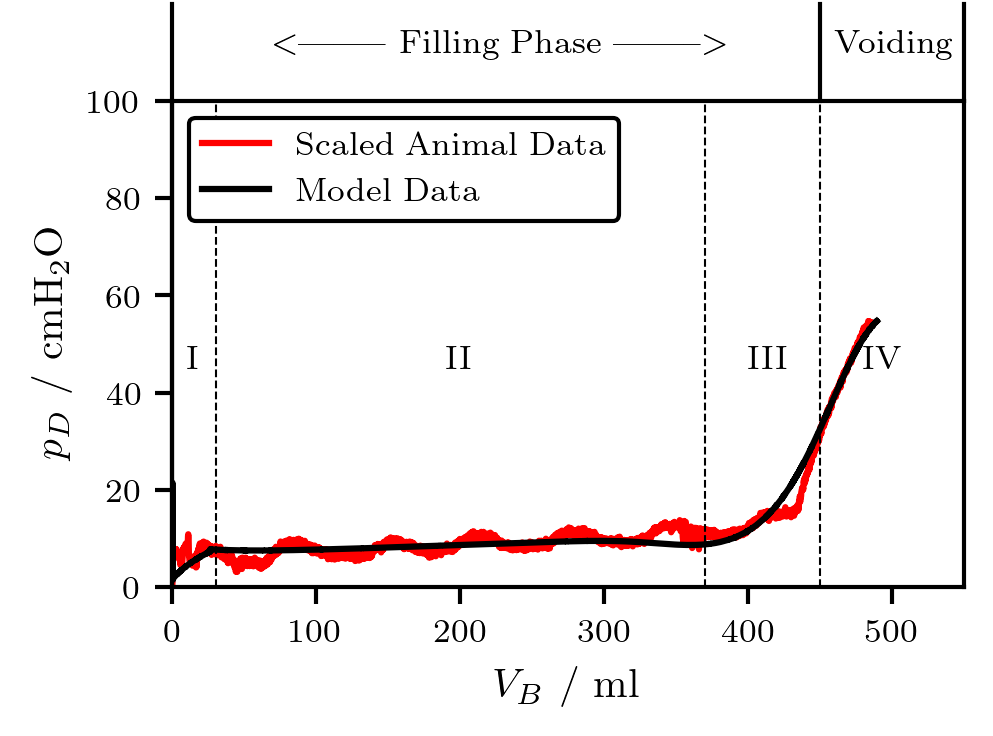

In [8]:
non_void_data = plot_data[(plot_data['voiding'] == 0) & (plot_data['V_B'] > 0.000001)]
non_voiding_vol *= 0.99* non_void_data['V_B'].max() / (non_voiding_vol.max()) # Scale to provide visual comparison
non_voiding_pres *= non_void_data['p_D'].max() / (non_voiding_pres.max())

# Plot scatter plot of pressure vs volume
# Sort the data by volume
non_voiding_vol = non_voiding_vol[np.argsort(non_voiding_vol)]
non_voiding_pres = non_voiding_pres[np.argsort(non_voiding_vol)]

non_void_data = non_void_data.sort_values('V_B')

fig, ax = plt.subplots()
plt.plot(non_voiding_vol, non_voiding_pres, color='red')
plt.plot(non_void_data['V_B'], non_void_data['p_D'], color='black')
# X-axis bounds (0, 500)
plt.xlim(0, 550)
plt.ylim(0, 100)
# Add phase lines and labels
plt.axvline(30, color='black', linestyle='--', linewidth=0.5)
plt.axvline(370, color='black', linestyle='--', linewidth=0.5)
plt.axvline(450, color='black', linestyle='--', linewidth=0.5)
# Add labels for I, II, III, IV
plt.text(10, 45, 'I', fontsize=8)
plt.text(190, 45, 'II', fontsize=8)
plt.text(400, 45, 'III', fontsize=8)
plt.text(480, 45, 'IV', fontsize=8)

# Add axis labels
plt.xlabel('$V_B$ / ml')
plt.ylabel('$p_D$ / cmH$_2$O')

# Add headers for <-- Filling Phase --> and <-- Voiding Phase -->
plt.text(70, 110, '$<$-------- Filling Phase --------$>$', fontsize=8)
# Add vertical line for voiding phase that continues to the top of the plot above the x-axis
# use line2D to create a line with a label
line = Line2D([0, 0], [0, 120], color='k', linestyle='-', linewidth=1)
line.set_clip_on(False)
ax.add_line(line)
line = Line2D([450, 450], [100, 120], color='k', linestyle='-', linewidth=1)
line.set_clip_on(False)
ax.add_line(line)

line = Line2D([550, 550], [100, 120], color='k', linestyle='-', linewidth=1)
line.set_clip_on(False)
ax.add_line(line)

plt.text(460, 110, 'Voiding', fontsize=8)

plt.legend(['Scaled Animal Data', 'Model Data'], loc='upper left', markerscale=5)

plt.savefig('Figure3.png', dpi=my_dpi, bbox_inches='tight')

plt.show()


## Figure 4: Distribution of Intervoid Intervals.

In [9]:
# Run the model for 50 days
days = 50
hrs = 24*days
maxTime = hrs * 60 * 60
dT = 0.1

data2 = LUT.process_neural_input(maxTime, dT, verbose=True, noise=1)

voiding_indices = np.where(np.diff(data2['voiding']) == 1)[0]
void_end_indices = np.where(np.diff(data2['voiding']) == -1)[0]

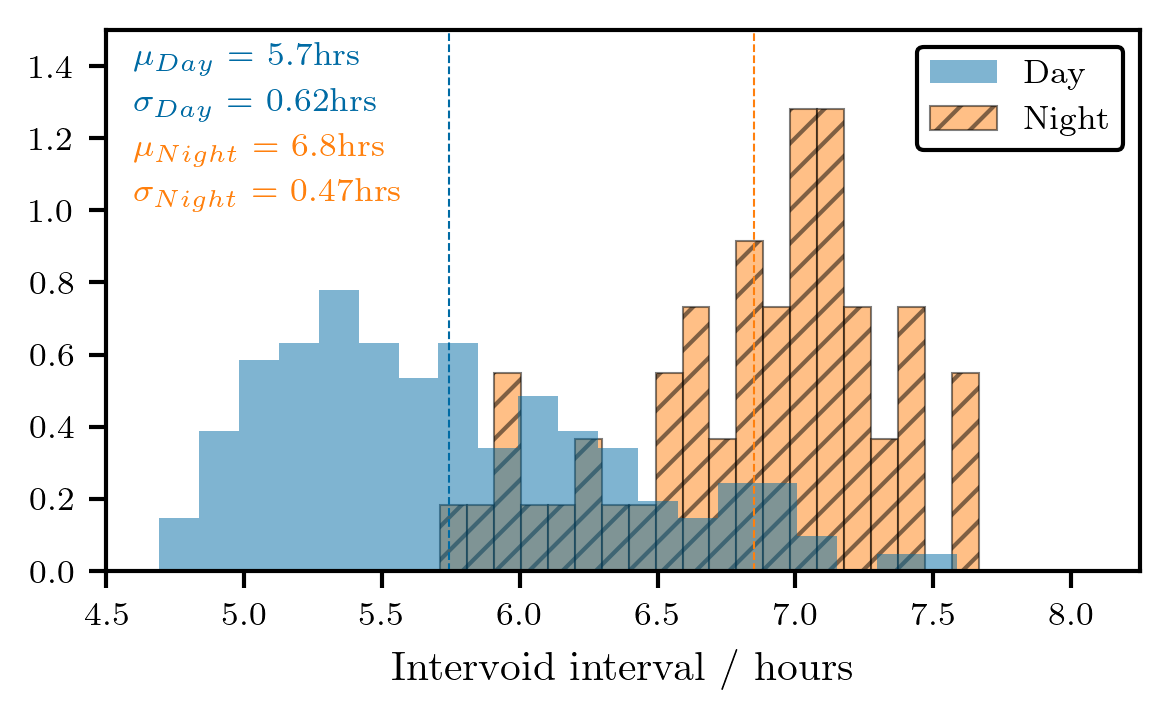

In [10]:
# Intervoid interval - time between two voiding phases
intervoid_interval = np.diff(data2.iloc[voiding_indices]['t'])
# Create a dataframe to store intervoid interval and day/night 
starting_times = data2.iloc[voiding_indices]['t']
# Drop last voiding phase as there is no end time
starting_times = starting_times[:-1]
intervoids = pd.DataFrame({'starting_void': starting_times, 'intervoid_interval': intervoid_interval})

# Find the day/night for each intervoid interval
intervoids["starting_void_hours"] = (intervoids['starting_void'] / 3600) % 24
intervoids["day_night"] = "Day"

sleep_hour = 21
wake_hour = (sleep_hour + 8) % 24

intervoids.loc[(intervoids["starting_void_hours"] > sleep_hour) | (intervoids["starting_void_hours"] < wake_hour), "day_night"] = "Night"

sleep_time = 24 - sleep_hour + wake_hour

# Convert to hours
dayColor = '#006BA4'
nightColor = '#FF800E'
hatchColor = 'k'
intervoids['intervoid_interval'] = intervoid_interval / 3600
fig, ax = plt.subplots(figsize=(4, 2.5))
# Plot histogram of intervoid intervals coloured by day/night
plt.hist(intervoids[intervoids['day_night'] == 'Day']['intervoid_interval'], bins=20, alpha=0.5, color=dayColor, label='Day', density=True, zorder=2)
plt.hist(intervoids[intervoids['day_night'] == 'Night']['intervoid_interval'], bins=20, alpha=0.5, color=nightColor, label='Night', density=True, hatch='///', edgecolor=hatchColor, linewidth=0.5, zorder=1)

# Add text means and standard deviations
day_mean = intervoid_interval[intervoids['day_night'] == 'Day'].mean() / 3600
night_mean = intervoid_interval[intervoids['day_night'] == 'Night'].mean() / 3600

day_std = intervoid_interval[intervoids['day_night'] == 'Day'].std() / 3600
night_std = intervoid_interval[intervoids['day_night'] == 'Night'].std() / 3600

text_x = 4.6
text_y = 1.4
y_sep = 0.125

label = "$\\mu_{Day}$"
plt.text(text_x, text_y, f'{label} = {day_mean:.1f}hrs', fontsize=8, color=dayColor)
label = "$\\sigma_{Day}$"
plt.text(text_x, text_y-y_sep, f'{label} = {day_std:.2f}hrs', fontsize=8, color=dayColor)

label = "$\\mu_{Night}$"
plt.text(text_x, text_y-2*y_sep, f'{label} = {night_mean:.1f}hrs', fontsize=8, color=nightColor)
label = "$\\sigma_{Night}$"
plt.text(text_x, text_y-3*y_sep, f'{label} = {night_std:.2f}hrs', fontsize=8, color=nightColor)

# Plot means
plt.axvline(day_mean, color=dayColor, linestyle='--', linewidth=0.5)
plt.axvline(night_mean, color=nightColor, linestyle='--', linewidth=0.5)


plt.xlabel('Intervoid interval / hours')
# Legend location top right
plt.legend(loc='upper right')

# Set bounds
plt.xlim(4.5, 8.25)
plt.ylim(0, 1.5)

# Export
plt.tight_layout()
plt.savefig('Figure4.png', dpi=my_dpi, bbox_inches='tight')
plt.show()

## Figure 5: Box plot illustrating the distribution of filling rates under different noise parameter values.

Running model for 12.0 hours on 5 noise parameters.
Running model for noise parameter 0
Running model for noise parameter 0.1
Running model for noise parameter 0.3
Running model for noise parameter 0.5
Running model for noise parameter 1


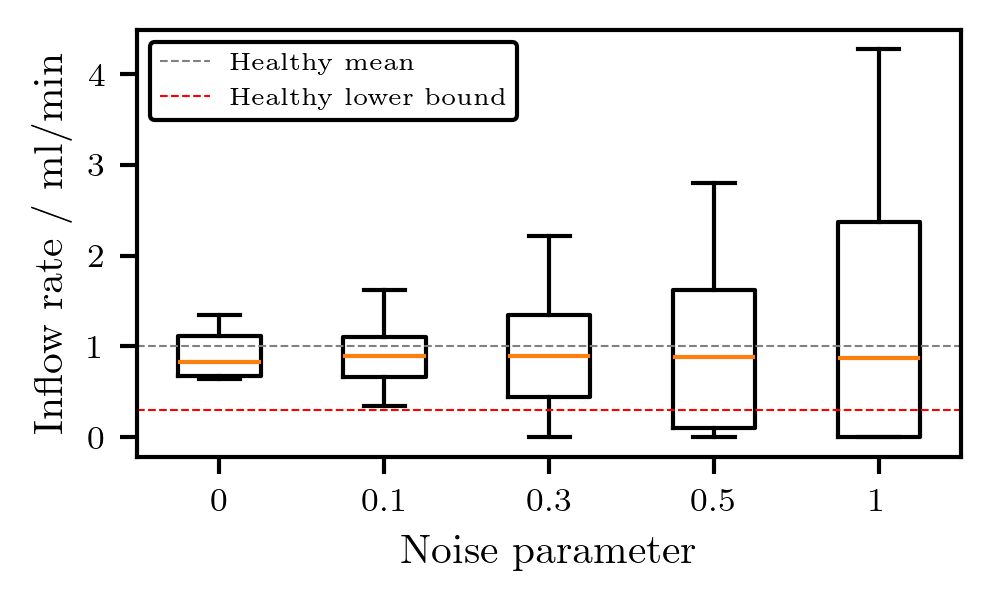

In [11]:
# Test robustness of noise parameter
seed = 42 # Set seed for reproducibility between LUT model instances
## Create a range of noise parameters
noise_params = [0, 0.1, 0.3, 0.5, 1]

## Run the model on each noise parameter and store the V_B values in a merged dataframe
days = 0.5
hrs = 24*days
maxTime = hrs * 60 * 60
dT = 0.2

robustness_test_results = pd.DataFrame()
robustness_test_results['t'] = np.arange(0, maxTime, dT)

robustness_intervoid_intervals = {}

robustness_Q_in = pd.DataFrame()
robustness_Q_in['t'] = np.arange(0, maxTime, dT)


print(f'Running model for {hrs} hours on {len(noise_params)} noise parameters.')

def get_intervoid_interval(data):
    voiding_indices = np.where(np.diff(data['voiding']) == 1)[0]

    # Intervoid interval - time between two voiding phases
    intervoid_interval = np.diff(data.iloc[voiding_indices]['t'])

    return intervoid_interval

for noise in noise_params:
    print(f'Running model for noise parameter {noise}')
    LUT = model.LUT() # Reset the model
    data_noise = LUT.process_neural_input(maxTime, dT, noise, seed=seed)
    # Add the noise parameter as a column of the noise parameter
    robustness_test_results[noise] = data_noise['V_B']
    # Calculate the intervoid interval
    intervoid_interval = get_intervoid_interval(data_noise)
    robustness_intervoid_intervals[noise] = intervoid_interval
    # Extract Q_in
    robustness_Q_in[noise] = data_noise['Q_in']
# Drop first row as it is the initial condition
robustness_Q_in_t = robustness_Q_in[1:]
# Plot the same for inflow rate
fig, ax = plt.subplots()
nps = [0, 0.1, 0.3, 0.5, 1]
data = [robustness_Q_in_t[noise]*1e6*60 for noise in nps]
ax.boxplot(data, labels=nps)
ax.set_xticklabels(nps)
plt.axhline(1, color='grey', linestyle='--', linewidth=0.5, label='Healthy mean')
plt.axhline(0.3, color='red', linestyle='--', linewidth=0.5, label='Healthy lower bound')
#plt.axhline(15, color='red', linestyle='--', linewidth=0.5)
plt.xlabel('Noise parameter')
plt.ylabel('Inflow rate / ml/min')
# Decrease legend font size
plt.legend(fontsize=6)
# Export
plt.tight_layout()
plt.savefig('Figure5.png', dpi=my_dpi, bbox_inches='tight')
plt.show()

# Figure 6: Noise sensitivity analysis of model parameters (excluding inflow rate)

In [12]:
seed = 42 # Set seed for reproducibility between LUT model instances

noise_params = [0, 0.1, 0.3, 0.5, 0.7, 1]

min_noise = 0
max_noise = 1.0
n = 6
noise_params = np.linspace(min_noise, max_noise, n)

## Run the model on each noise parameter and store the values in a merged dataframe
days = 2
hrs = 24*days
maxTime = hrs * 60 * 60
dT = 0.2

noise_data = {}

for noise in noise_params:
    print(f'Running model for noise parameter {noise}')
    LUT = model.LUT() # Reset the model
    data_noise = LUT.process_neural_input(maxTime, dT, noise, seed=seed, V_unit="ml", p_unit="cmH2O") # Run the model
    noise_data[noise] = data_noise


Running model for noise parameter 0.0
Running model for noise parameter 0.2
Running model for noise parameter 0.4
Running model for noise parameter 0.6000000000000001
Running model for noise parameter 0.8
Running model for noise parameter 1.0


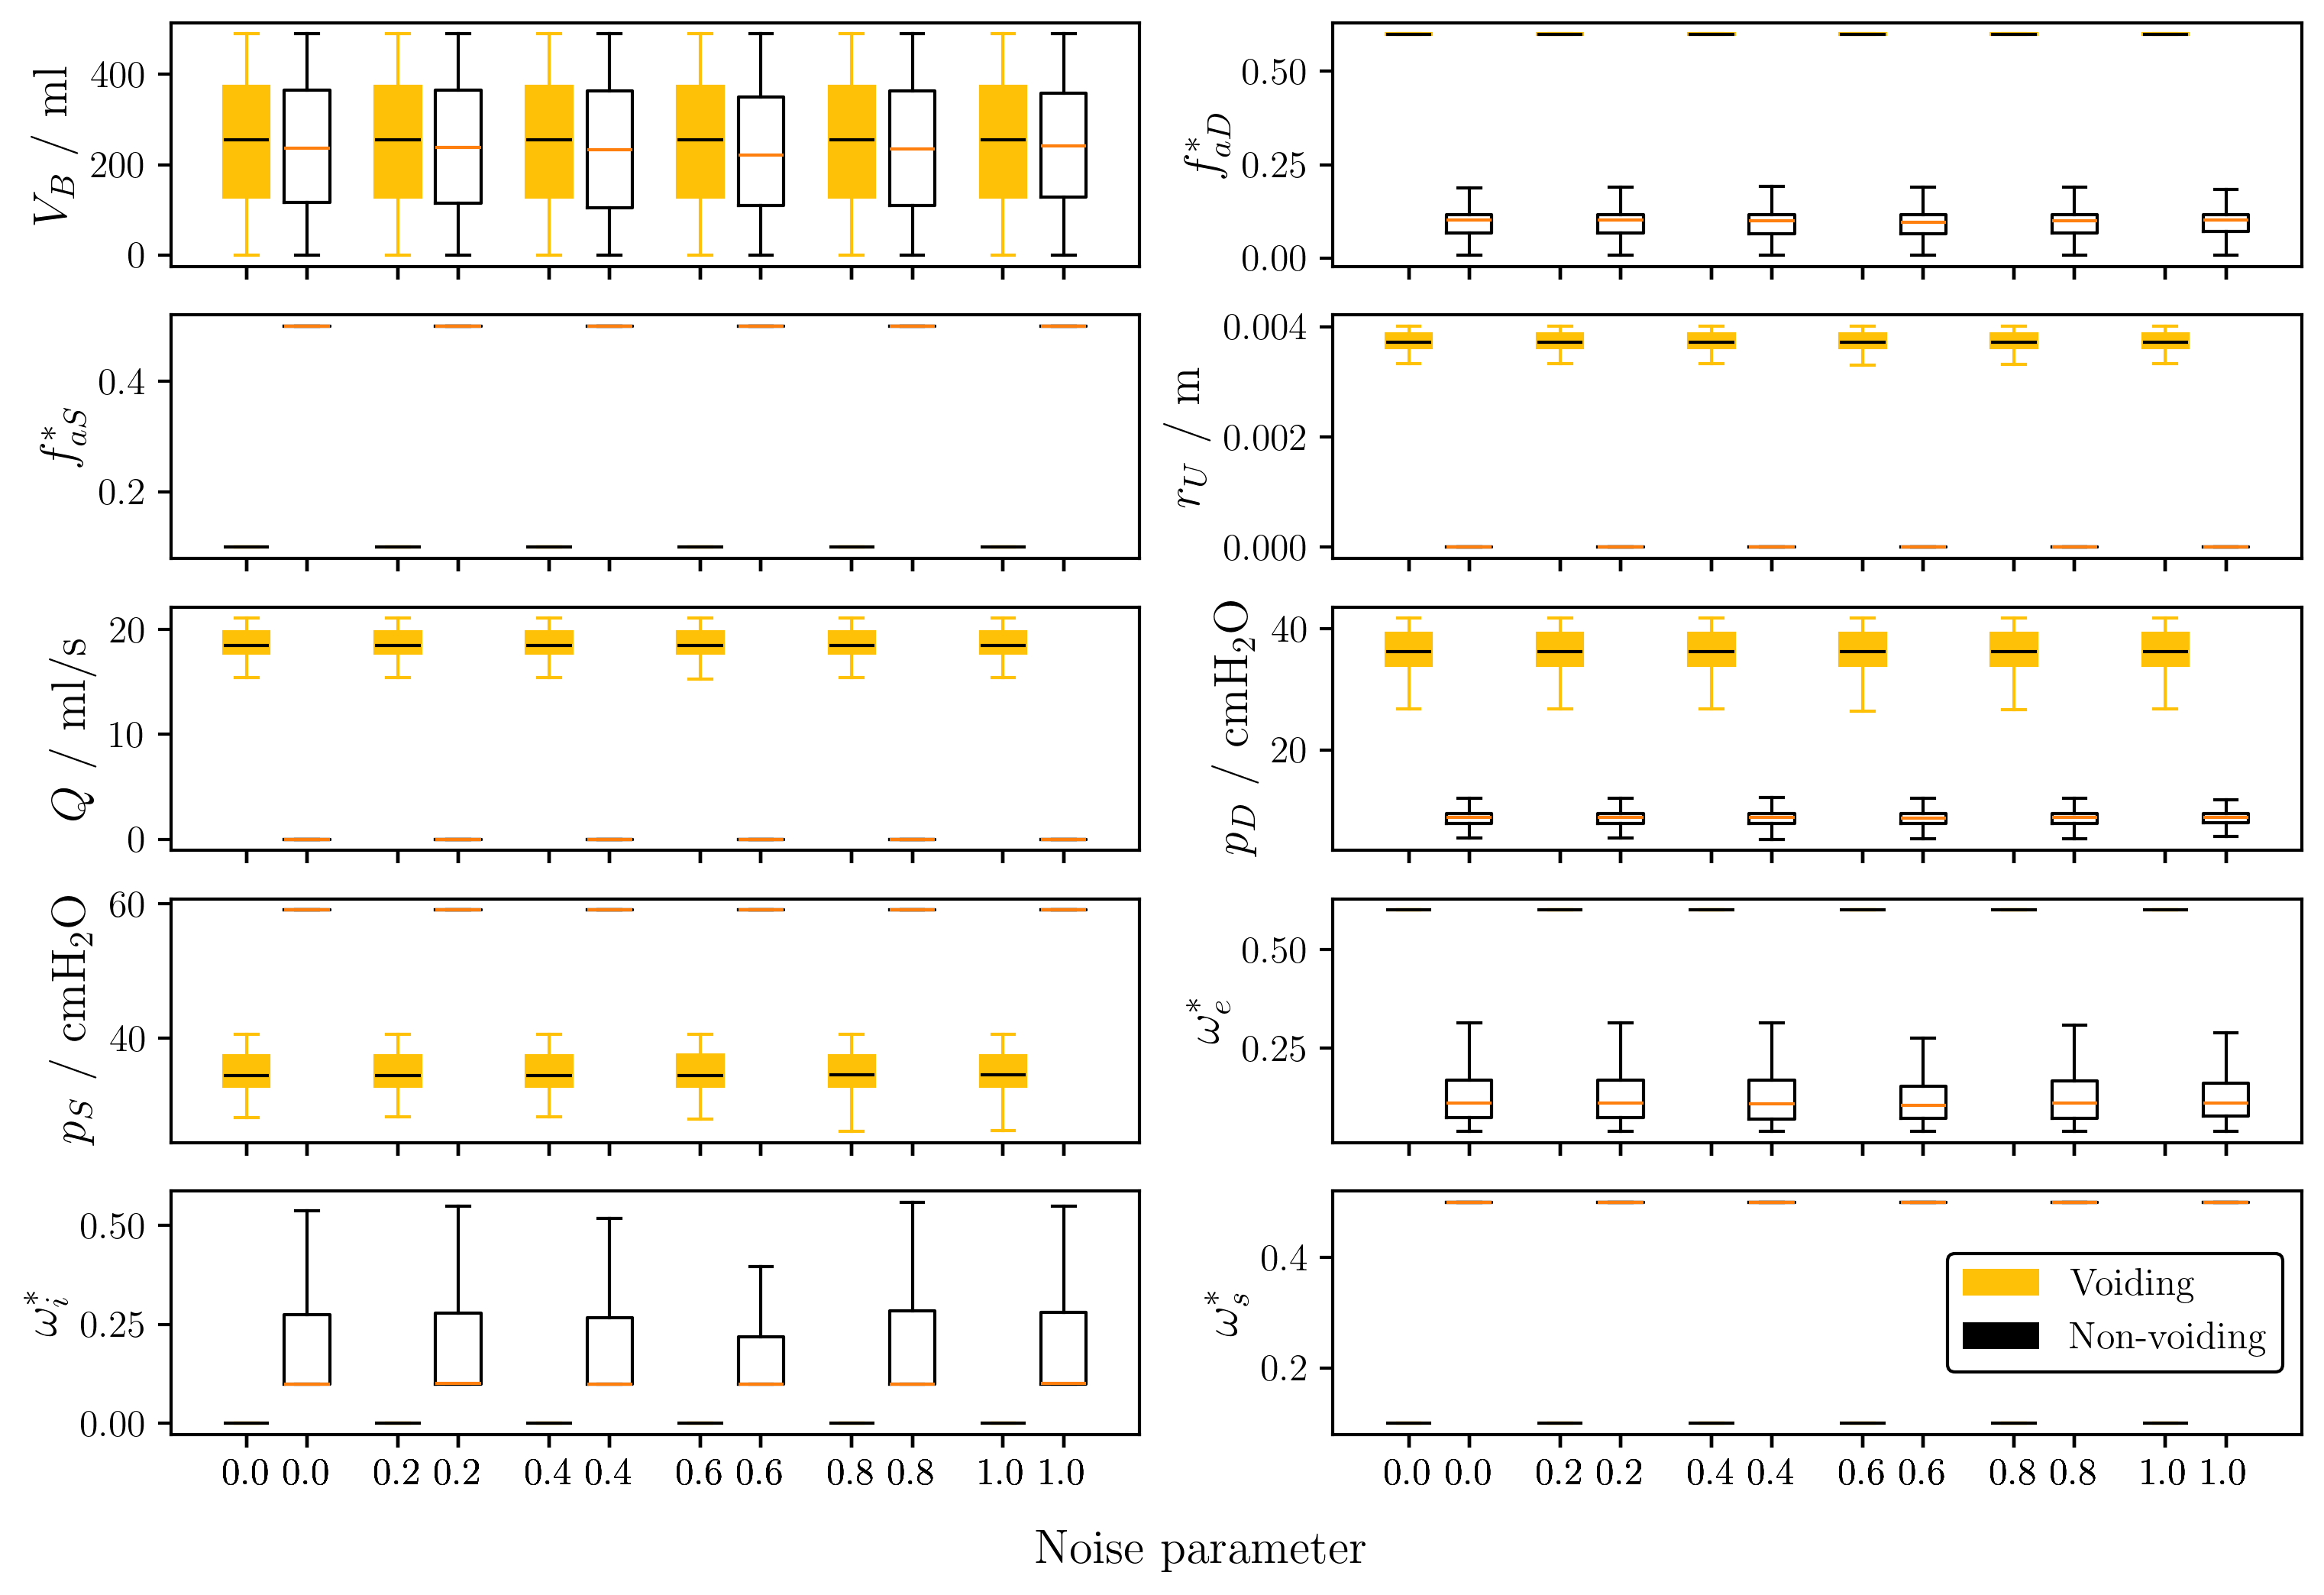

In [13]:
# Make text larger
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'axes.labelsize': 15})
plt.rcParams.update({'legend.fontsize': 12})
plt.rcParams.update({'axes.titlesize': 15})
plt.rcParams.update({'xtick.labelsize': 12})
plt.rcParams.update({'ytick.labelsize': 12})

# Drop first row as it is the initial condition
noise_data_t = {noise: data[1:] for noise, data in noise_data.items()}

# Plot the distribution of each field for each noise parameter
fields = ['V_B', 'f_aD_s', 'f_aS_s', 'r_U', 'Q', 'p_D', 'p_S', 'w_e_s',
          'w_i_s', 'w_s_s']
field_labels = ['$V_B$', '$f_{aD}^*$', '$f_{aS}^*$', '$r_U$', '$Q$', '$p_D$',
                '$p_S$', '$\\omega_e^*$', '$\\omega_i^*$', '$\\omega_s^*$']

text_labels = ['Volume', 'Norm. Activation (Detrusor)', 'Norm. Activation (Sphincter)', 'Urethral Radius', 'Outflow Rate', 'Detrusor Pressure / cmH$_2$O', 'Sphincter Pressure', 'Neural Excitatory Unit - Detrusor', 'Neural Inhibitory Unit - Detrusor', 'Neural Unit - Sphincter']
field_units = [' / ml', '', '', ' / m', ' / ml/s', ' / cmH$_2$O', ' / cmH$_2$O', '', '', '']
field_labels = [f'{field_labels[i]}{field_units[i]}' for i in range(len(field_labels))]



# Create subplots
fig, axs = plt.subplots(5, 2, figsize=(12, 8), sharex='col', sharey=False)

labels_str = [str(np.round(noise, 2)) for noise in noise_params]

for i, field in enumerate(fields):
    # Plot boxplot for each field
    # Split the data into voiding and non-voiding phases, Q = 0 is non-voiding
    data = [noise_data_t[noise] for noise in noise_params]
    voiding_data = [d[d['Q'] > 0][field] for d in data]
    non_voiding_data = [d[d['Q'] == 0][field] for d in data]

    # Make each box plot a different colour, and half the width so they don't overlap
    c = '#FFC107'
    axs[i // 2, i % 2].boxplot(voiding_data, showfliers=False, labels=labels_str, zorder=2, positions=np.arange(n) - 0.2, widths=0.3, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black'),
            )
    
    axs[i // 2, i % 2].boxplot(non_voiding_data, showfliers=False, labels=labels_str, positions=np.arange(n) + 0.2, widths=0.3)
    axs[i // 2, i % 2].set_ylabel(field_labels[i])

# Add a legend for voiding and non-voiding
voiding_patch = plt.Rectangle((0, 0), 1, 1, fc=c)
non_voiding_patch = plt.Rectangle((0, 0), 1, 1, fc='black')
axs[-1, -1].legend([voiding_patch, non_voiding_patch], ['Voiding', 'Non-voiding'], loc='center right')
# Add x-axis label for all subplots - centered
fig.text(0.5, 0.04, 'Noise parameter', ha='center')

# Export
plt.savefig('Figure6.png', dpi=my_dpi, bbox_inches='tight')